In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import analyze as a
import matplotlib.pyplot as plt
import numpy as np
import paper_plots as pp
import sweep_analyze as sa

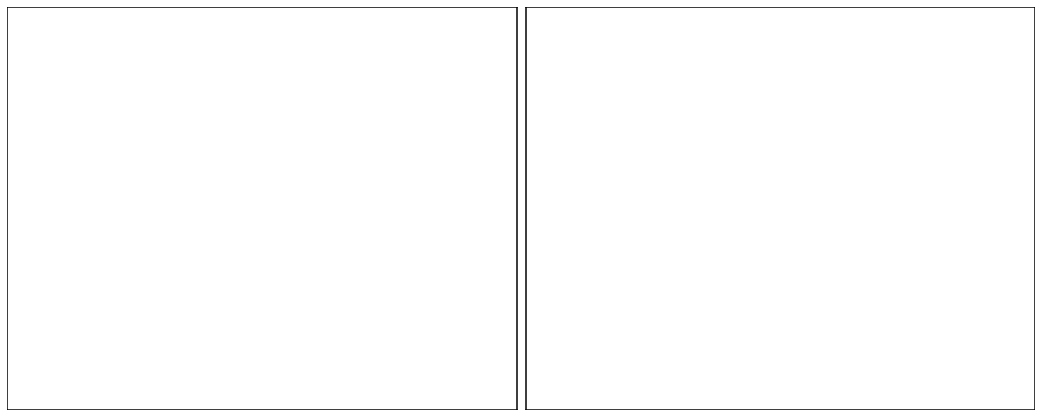

In [175]:
panel_width = 1.4  # m
dy = panel_width
panel_length = 1.18  # m
panel_sep = 2e-2  # 2 cm
dx = 2* panel_length + panel_sep
fig = plt.figure()
ax = fig.add_axes([0., 0., dx, dy])
ax.axis('off')
ax.axvline(x=0, ymin=0, ymax=1, c='k')
ax.axvline(x=panel_length, ymin=0, ymax=1, c='k')
ax.axvline(x=panel_length+panel_sep, ymin=0, ymax=1, c='k')
ax.axvline(x=2*panel_length+panel_sep, ymin=0, ymax=1, c='k')
ax.axhline(y=0, xmin=0, xmax=panel_length/dx, c='k')
ax.axhline(y=0, xmin=(panel_length+panel_sep)/dx, xmax=1, c='k')
ax.axhline(y=dy, xmin=0, xmax=panel_length/dx, c='k')
ax.axhline(y=dy, xmin=(panel_length+panel_sep)/dx, xmax=1, c='k')
ax.set_xlim(0, dx)
ax.set_ylim(0, dy)
ax.text(panel_length/2, )
plt.show()

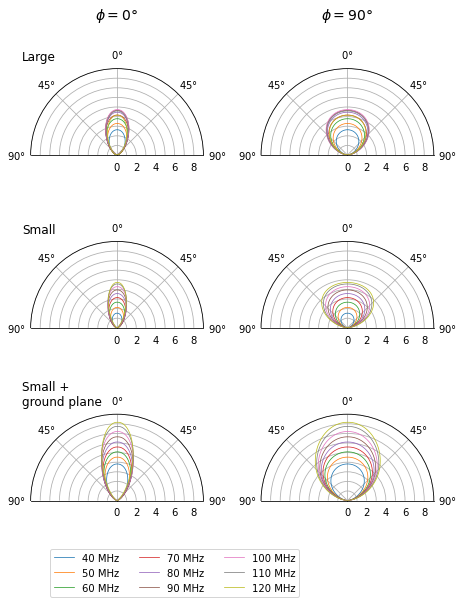

In [19]:
fig, axs = a.polar_beam(gl, f, figsize=(5,3))

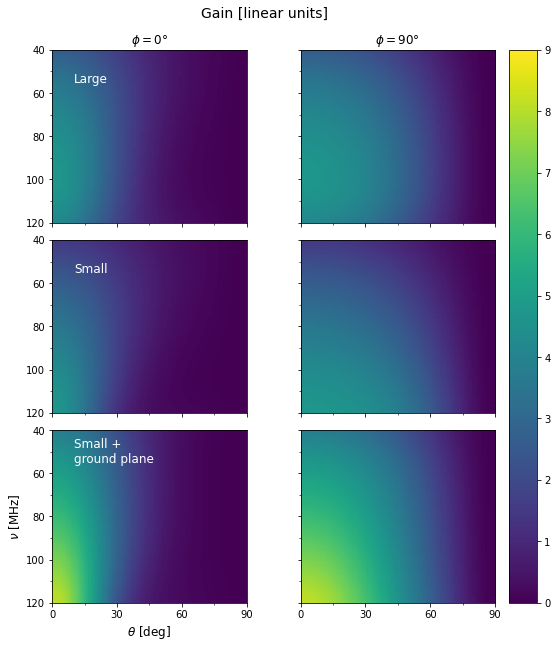

In [35]:
fig, axs = pp.beams(gl, f, False, figsize=(5,3))

In [20]:
fig.savefig('plots/paper_figs/beams.pdf', bbox_inches='tight')

In [3]:
f, t, l = a.get_ftl(0)
tsouth = a.get_ftl(0, 'sweep', '-24.0', return_fl=False)

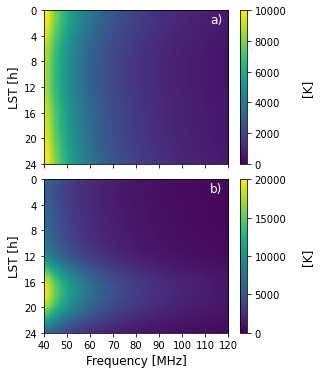

In [4]:
fig, axs = a.plot_temp_3d(f, l, t, tsouth, figsize=(4,16/6))

In [5]:
fig.savefig('plots/paper_figs/temp3d.pdf', bbox_inches='tight')

In [6]:
largell = np.load('sweep/rms_large_ll.npy')
largeep = np.load('sweep/rms_large_ep.npy')
smallll = np.load('sweep/rms_small_ll.npy')
smallep = np.load('sweep/rms_small_ep.npy')
gpll = np.load('sweep/rms_gp_ll.npy')
gpep = np.load('sweep/rms_gp_ep.npy')

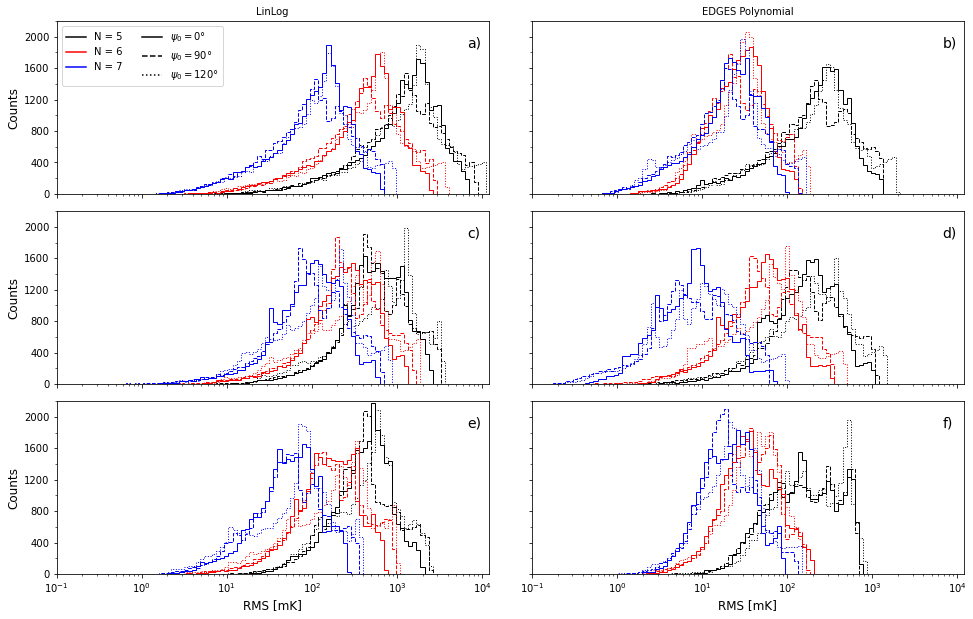

In [15]:
fig, axs = pp.histogram(largell, largeep, smallll, smallep, gpll, gpep)

In [16]:
fig.savefig('plots/paper_figs/histogram.pdf', bbox_inches='tight')

In [17]:
rms_arr_list = np.load('sweep/sweep_rms.npy')

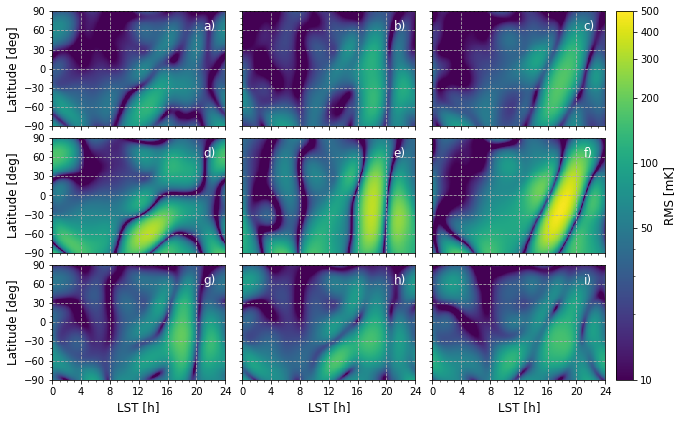

In [37]:
fig, axs = sa.subplot(rms_arr_list, (3,2))

In [38]:
fig.savefig('plots/paper_figs/rms_sweep.pdf', bbox_inches='tight')

In [39]:
rms_n = np.load('rms_snapshots_MARS.npy')

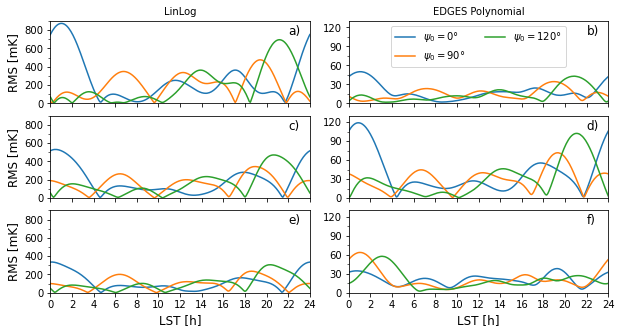

In [43]:
fig, axs = pp.plot_rms(rms_n, (10,5))

In [44]:
fig.savefig('plots/paper_figs/rms_mars.pdf', bbox_inches='tight')

In [45]:
rms_s = np.load('rms_snapshots_south.npy')

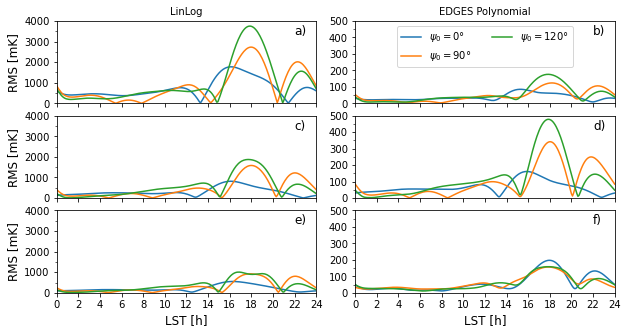

In [48]:
fig, axs = pp.plot_rms(rms_s, (10,5), north=False)

In [49]:
fig.savefig('plots/paper_figs/rms_south.pdf', bbox_inches='tight')

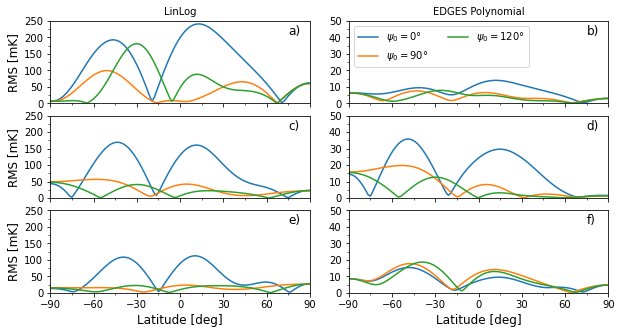

In [50]:
fig, axs = sa.rmsvslat()

In [51]:
fig.savefig('plots/paper_figs/rms_vs_lat.pdf', bbox_inches='tight')

In [4]:
rms_fg = np.load('result_files/rmsvslat_24h_foregrounds.npy')
rms_gauss40 = np.load('result_files/rmsvslat_24h_gauss40.npy') 
rms_gauss80 = np.load('result_files/rmsvslat_24h_gauss80.npy')
rms_gauss120 = np.load('result_files/rmsvslat_24h_gauss120.npy')
rms_edges = np.load('result_files/rmsvslat_24h_edges.npy')

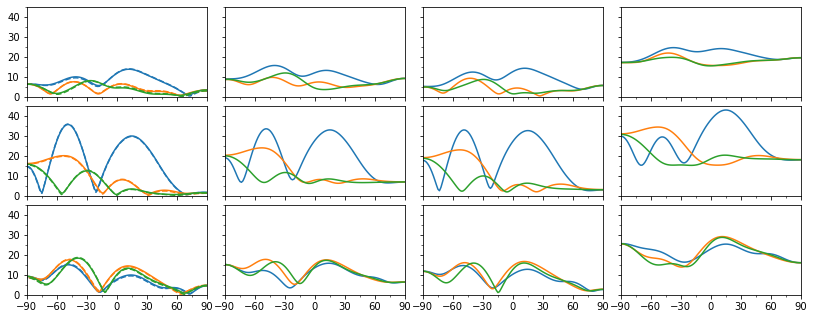

In [5]:
fig, axs = sa.rmsvslat_21cm(rms_fg, rms_gauss40, rms_gauss80, rms_gauss120, rms_edges)

In [52]:
rms_arr_super_MARS = np.load('lst2d_mars.npy')

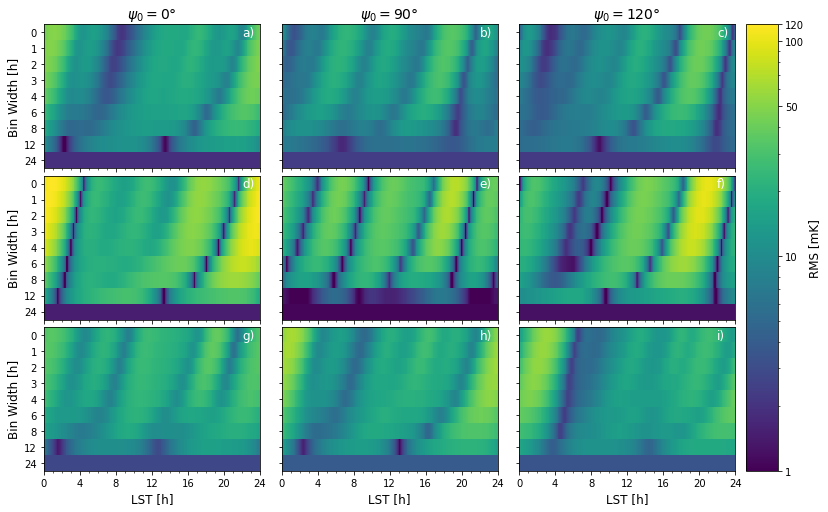

In [90]:
fig, axs = a.subplot_LSTbins(rms_arr_super_MARS, 1, 120)

In [91]:
fig.savefig('plots/paper_figs/lstbin_mars.pdf', bbox_inches='tight')

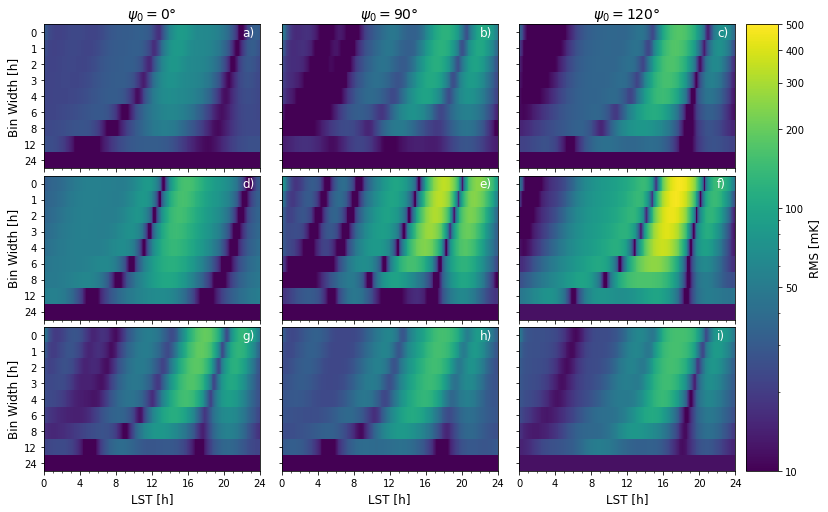

In [92]:
fig, axs = a.subplot_LSTbins(rms_arr_super_south, 10, 500)

In [93]:
fig.savefig('plots/paper_figs/lstbin_south.pdf', bbox_inches='tight')

In [132]:
gauss40 = np.load('gauss40.npy')
gauss80 = np.load('gauss80.npy')
gauss120 = np.load('gauss120.npy')
edges = np.load('edges_ratios.npy')

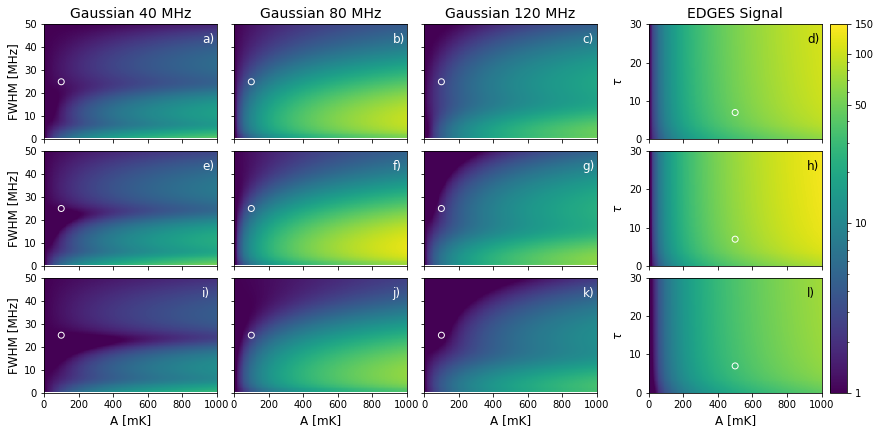

In [133]:
fig = a.plot_gauss_edges(gauss40, gauss80, gauss120, edges)

In [134]:
fig.savefig('plots/paper_figs/mock_signal_ratios_north0.pdf', bbox_inches='tight')

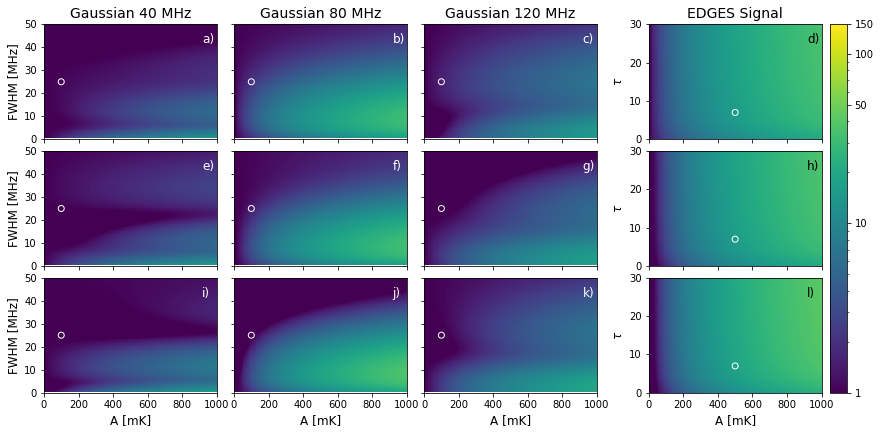

In [135]:
fig = a.plot_gauss_edges(gauss40, gauss80, gauss120, edges, north=False)

In [136]:
fig.savefig('plots/paper_figs/mock_signal_ratios_south0.pdf', bbox_inches='tight')